<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Fractales aleatorios</font> </center>




<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/fa/Fractal_Crown_of_morgoth2_5600x4200.jpg" width="400px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/80/Super-volcano_Tierazon_fractal_Tiera4414.jpg" width="400px" height="125px" />


**Referencias:**
- http://fractalfoundation.org/resources/what-are-fractals/
- https://georgemdallas.wordpress.com/2014/05/02/what-are-fractals-and-why-should-i-care/
- https://en.wikipedia.org/wiki/Barnsley_fern

Antes que nada, ¿qué son fractales?

___
## 1. Fractales

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/2/21/Mandel_zoom_00_mandelbrot_set.jpg" width="400px" height="125px" />

- La geometría fractal es un campo de las matemáticas que tiene lugar a partir de los años setenta, y fue desarrollada principalmente por [Benoit Mandelbrot](https://es.wikipedia.org/wiki/Beno%C3%AEt_Mandelbrot).

- La geometría elemental que aprendimos en la escuela se trataba de estudiar (y hacer) formas o figuras. Pues bien, la geometría fractal no es distinta.

- Mientras que en geometría clásica las formas son suaves (círculos, triángulos, etcétera), las formas que produce la geometría fractal es tosca e infinitamente compleja.

Bueno, ¿y cuál es su importancia?
1. El proceso por el cual se obtienen formas fractales es impresionantemente simple y completamente diferente al seguido en geometría clásica. Mientras la geometría clásica se usan fórmulas para definir una forma, la geometría fractal usa iteración. Básicamente, podríamos decir que los fractales son imágenes de sistemas dinámicos.

2. Las formas fractales se parecen mucho a formas encontradas en la naturaleza. Este impresionante hecho es difícil de ignorar. Como sabemos no existen círculos perfectos en la naturaleza, ni cuadrados perfectos. No es solo eso, el solo mirar los árboles, ríos o montañas, y no se encuentra una forma que sea descrita por una fórmula. Sin embargo, usando fórmulas simples iteradas muchas veces, la geometría fractal puede modelar esos fenómenos con alta precisión. Si puedes usar matemáticas simples para modelar el mundo, vas por buen camino.


<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Fractal_canopy.svg/1200px-Fractal_canopy.svg.png" width="400px" height="125px" />

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Sa-fern.jpg" width="400px" height="125px" />

La figura de la derecha (planta verde) corresponde a un helecho. El matemático británico [Michael Barnsley](https://en.wikipedia.org/wiki/Michael_Barnsley) fue quien primero describió un fractal que representa impresionantemente bien estas plantas, en su libro *'Fractals Everywhere'*.

## 2. Fractal helecho de Barnsley
El helecho de Barnsley es un fractal que usa cuatro transformaciones afines para generar los nuevos puntos. En la escogencia de cuál transformación usar para generar el siguiente punto es donde entra el componente probabilístico.

Este fractal se puede describir de la siguiente manera:

$$\left[\begin{array}{c}x_{k+1}\\ y_{k+1}\end{array}\right]=\left[\begin{array}{cc}a_i & b_i \\ c_i & d_i\end{array}\right]\left[\begin{array}{c}x_k\\ y_k\end{array}\right]+\left[\begin{array}{c}e_i\\f_i\end{array}\right],$$

donde $a_i$, $b_i$, $c_i$, $d_i$, $e_i$ y $f_i$ son coeficientes que dependen de la variable aleatoria $i\in\left\lbrace 0,1,2,3\right\rbrace$. Las condiciones iniciales son $x_0=y_0=0$.

Las probabilidades de ocurrencia de cada valor de $i$ son $P\left\lbrace i=0\right\rbrace=p_0=0.01$, $P\left\lbrace i=1\right\rbrace=p_1=0.85$, $P\left\lbrace i=2\right\rbrace=p_2=0.07$ y $P\left\lbrace i=3\right\rbrace=p_3=0.07$ (notar que la suma de las probabilidades es 1).

Todas las anteriores constantes se resume en la siguiente tabla (matriz):

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [22]:
# Matriz de Barnsley
i = np.arange(4)

df = pd.DataFrame(index=i, 
                  columns = ['ai','bi','ci','di','ei','fi','pi','porción generada'], 
                  dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0,0.85,0.2,-0.15]
df['bi'] = [0.0,0.04,-0.26,0.28]
df['ci'] = [0.0,-0.04,0.23,0.26]
df['di'] = [0.16,0.85,0.22,0.24]
df['ei'] = [0.0,0.0,0.0,0.0]
df['fi'] = [0.0,1.6,1.6,0.44]
df['pi'] = [0.01,0.85,0.07,0.07]

df['porción generada']=['Tallo','Follaje cada vez más pequeño',
                       'Ramas Izquierda','Ramas derecha']
df.round(2)

,ai,bi,ci,di,ei,fi,pi,porción generada
$i$,,,,,,,,
0,0.00,0.00,0.00,0.16,0.0,0.00,0.01,Tallo
1,0.85,0.04,-0.04,0.85,0.0,1.60,0.85,Follaje cada vez más pequeño
2,0.20,-0.26,0.23,0.22,0.0,1.60,0.07,Ramas Izquierda
3,-0.15,0.28,0.26,0.24,0.0,0.44,0.07,Ramas derecha


Con la anterior descripción, generemos el helecho de Barnsley con un código en python...

In [23]:
# Importar librerías para graficar y de números aleatorios
from matplotlib import pyplot as plt


In [24]:
# Con números
df.iloc[:,6]

$i$
0    0.01
1    0.85
2    0.07
3    0.07
Name: pi, dtype: float64

In [25]:
df.iloc[:,-1]

$i$
0                           Tallo
1    Follaje cada vez más pequeño
2                 Ramas Izquierda
3                   Ramas derecha
Name: porción generada, dtype: object

In [26]:
df.iloc[:,6].values

array([0.01, 0.85, 0.07, 0.07])

In [27]:
# Con los nombres
df['ai'].values

array([ 0.  ,  0.85,  0.2 , -0.15])

In [28]:
# Matriz de Barnsley
mat_barnsley_helecho = df.iloc[:,:6].values 
p = df.loc[:,'pi'].values


In [29]:
mat_barnsley_helecho

array([[ 0.  ,  0.  ,  0.  ,  0.16,  0.  ,  0.  ],
       [ 0.85,  0.04, -0.04,  0.85,  0.  ,  1.6 ],
       [ 0.2 , -0.26,  0.23,  0.22,  0.  ,  1.6 ],
       [-0.15,  0.28,  0.26,  0.24,  0.  ,  0.44]])

In [30]:
p

array([0.01, 0.85, 0.07, 0.07])

In [31]:
p.sum()

1.0

In [32]:
# np.random.choice
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each

In [33]:
for i in range(50):
    print(np.random.choice(a=np.array([0,1,2,3]),p=p))

1
1
1
1
3
2
1
1
1
1
1
1
2
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
3
1
1
1


In [34]:
mat_barnsley_helecho

array([[ 0.  ,  0.  ,  0.  ,  0.16,  0.  ,  0.  ],
       [ 0.85,  0.04, -0.04,  0.85,  0.  ,  1.6 ],
       [ 0.2 , -0.26,  0.23,  0.22,  0.  ,  1.6 ],
       [-0.15,  0.28,  0.26,  0.24,  0.  ,  0.44]])

$$\left[\begin{array}{c}x_{k+1}\\ y_{k+1}\end{array}\right]=\left[\begin{array}{cc}a_i & b_i \\ c_i & d_i\end{array}\right]\left[\begin{array}{c}x_k\\ y_k\end{array}\right]+\left[\begin{array}{c}e_i\\f_i\end{array}\right],$$

x_k+1 =ai*xk + bi*yk + ei
y_k+1 = ci*xk + di*yk + fi

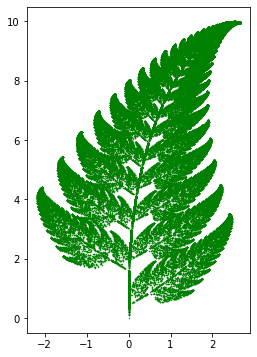

In [37]:
# Punto inicial
x0,y0=0,0
# Valores de i con su probabilidad
val_i = np.array([0,1,2,3])
# p
# Generación de puntos con las frecuencias dadas
N=100000
#Ceacion de las listas x y, que representan al vector en el k-esima iteracion

x,y=[x0],[y0]

for k in range(N):
    #Generar i
    i = np.random.choice(a=val_i, p = p)
    a_i = mat_barnsley_helecho[i,0]
    b_i = mat_barnsley_helecho[i,1]
    c_i = mat_barnsley_helecho[i,2]
    d_i = mat_barnsley_helecho[i,3]
    e_i = mat_barnsley_helecho[i,4]
    f_i = mat_barnsley_helecho[i,5]
    
    x_k = x[-1]
    y_k = y[-1]
    
    x_k1 = a_i*x_k + b_i*y_k + e_i
    y_k1 = c_i*x_k + d_i*y_k + f_i
    
    x.append(x_k1)
    y.append(y_k1)

# Graficamos
plt.figure(figsize=(4,6))
plt.plot(x,y,'.g',ms=1)

**Actividad:** jugando con los coeficientes de la transformación es posible crear mutaciones del helecho.

Un experimentador dió con una tabla de coeficientes que produce otro helecho que se ve muy parecido a la naturaleza. La tabla es la siguiente:

In [38]:
i = np.arange(1,5)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.95, 0.035, -0.04]
df['bi'] = [0.0, 0.005, -0.2, 0.2]
df['ci'] = [0.0, -0.005, 0.16, 0.16]
df['di'] = [0.25, 0.93, 0.04, 0.04]
df['ei'] = [0.0, -0.002, -0.09, 0.083]
df['fi'] = [-0.4, 0.5, 0.02, 0.12]
df['pi'] = [0.02, 0.84, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(3)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
1,0.000,0.000,0.000,0.25,0.000,-0.40,0.02,Tallo
2,0.950,0.005,-0.005,0.93,-0.002,0.50,0.84,Follaje cada vez más pequeño
3,0.035,-0.200,0.160,0.04,-0.090,0.02,0.07,Ramas izquierda
4,-0.040,0.200,0.160,0.04,0.083,0.12,0.07,Ramas derecha


## 3. Aplicación (elegible para proyecto)
Un paisaje fractal es una superficie generada usando un algoritmo estocástico diseñado para producir un comportamiento fractal que mimetiza la apariencia de un terreno natural. En otras palabras, el resultado de este procedimiento no es una superficie fractal determinística, sino una superficie aleatoria que exhibe comportamiento fractal.

<img style="float: left; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Animated_fractal_mountain.gif" width="300px" height="100px" />

<img style="float: center; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6e/FractalLandscape.jpg" width="300px" height="100px" />

<img style="float: right; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Fractal_terrain_texture.jpg" width="300px" height="100px" />

**Referencia:**
- https://en.wikipedia.org/wiki/Fractal_landscape